## Employee Salary Prediction using Linear Regression
### Problem Statement
#### Estimate an employee’s salary based on: Years of experience,Education level,Skill score,Number of certifications

| Column           | Description                        |
| ---------------- | ---------------------------------- |
| Experience_Years | Total years of experience          |
| Education_Level  | 1 = UG, 2 = PG, 3 = PhD            |
| Skill_Score      | Skill rating (0–100)               |
| Certifications   | Number of certifications           |
| Salary_LPA       | Salary in Lakhs per Annum (Target) |


### Step 1: Data Understanding & EDA

In [2]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
## Load the dataset
df=pd.read_csv('salary_data.csv')

In [27]:
##view the dataset
df.head()

,Experience_Years,Education_Level,Skill_Score,Certifications,Salary_LPA
0,0.5,1,42,0,2.1
1,0.8,1,48,0,3.0
2,1.0,1,46,1,2.6
3,1.3,1,52,1,3.8
4,1.5,1,50,0,3.1


In [28]:
## check for null values
df.isnull().sum()

Experience_Years    0
Education_Level     0
Skill_Score         0
Certifications      0
Salary_LPA          0
dtype: int64

In [29]:
## Summary statistics
df.describe()

,Experience_Years,Education_Level,Skill_Score,Certifications,Salary_LPA
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,5.271795,2.461538,70.307692,3.871795,8.343590
std,2.852418,0.755546,14.486207,2.418998,4.033334
min,0.500000,1.000000,42.000000,0.000000,2.100000
25%,2.900000,2.000000,59.000000,2.000000,4.950000
50%,5.300000,3.000000,70.000000,4.000000,7.700000
75%,7.650000,3.000000,82.500000,6.000000,11.450000
max,10.000000,3.000000,95.000000,8.000000,16.200000


In [30]:
## correlation
df.corr()


,Experience_Years,Education_Level,Skill_Score,Certifications,Salary_LPA
Experience_Years,1.000000,0.852404,0.988442,0.981919,0.987367
Education_Level,0.852404,1.000000,0.852255,0.825150,0.792878
Skill_Score,0.988442,0.852255,1.000000,0.984934,0.987985
Certifications,0.981919,0.825150,0.984934,1.000000,0.986692
Salary_LPA,0.987367,0.792878,0.987985,0.986692,1.000000


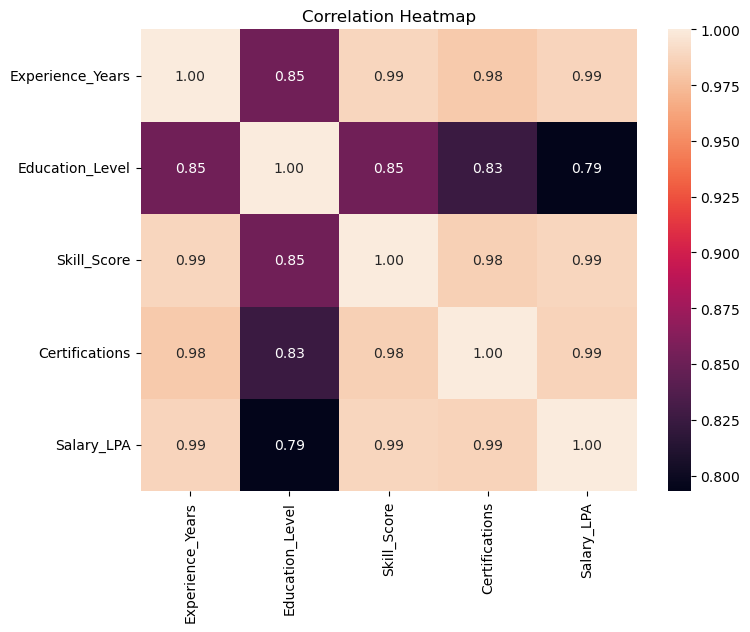

In [31]:
## Lets visualize the correlation with heatmap

corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.title("Correlation Heatmap")
plt.show()

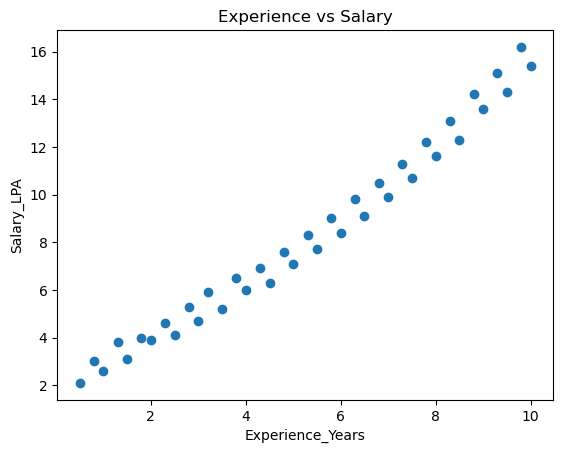

In [33]:
##Lets plot a scatter plot experience vs salary

plt.scatter(x=df["Experience_Years"],y=df["Salary_LPA"])
plt.xlabel("Experience_Years")
plt.ylabel("Salary_LPA")
plt.title("Experience vs Salary")
plt.show()

### Step:2 Data Preprocessing

In [36]:
## Feature Selection

X=df[["Experience_Years"]]
y=df["Salary_LPA"]

In [ ]:
print("Shape of X",X.shape) ## independent feature has to be in 2d array
print("Shape of y",y.shape)

Shape of X (39, 1)
Shape of y (39,)


In [38]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
y_train.head()

17    7.6
8     4.1
16    6.3
12    5.2
19    8.3
Name: Salary_LPA, dtype: float64

#### If needed we can go for feature scaling ,Here its fine so i am not going for feature scaling

### Step:3  Model Building

In [42]:
## Bulding the model in linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [43]:
regression.fit(X_train,y_train)

LinearRegression()

### Step:4 Model Evaluation

In [46]:
## R2score
from sklearn.metrics import r2_score

score=r2_score(y_test,regression.predict(X_test))
print(score)

0.9784165771459822


In [49]:
##MAE, MSE, RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

print("Mean absolute Error",mean_absolute_error(y_test,regression.predict(X_test)))
print("Mean Squared Error",mean_squared_error(y_test,regression.predict(X_test)))
print("RMSE",math.sqrt(mean_squared_error(y_test,regression.predict(X_test))))

Mean absolute Error 0.3881602689804261
Mean Squared Error 0.30090744806157493
RMSE 0.5485503149771905


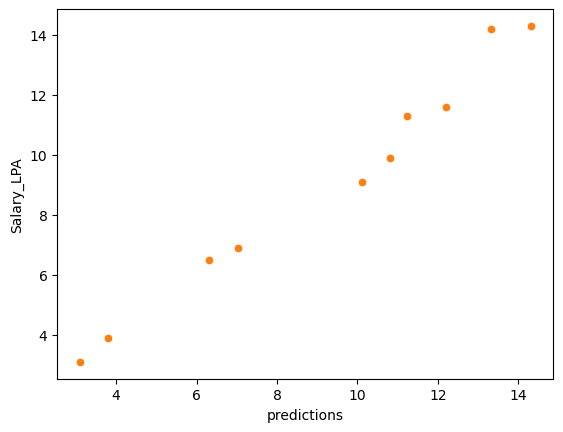

In [ ]:
##predictions 
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel("predictions")
plt.show()

In [61]:
##Multiple linear regression

# Features (multiple)
X_multi = df[['Experience_Years', 'Education_Level', 'Skill_Score', 'Certifications']]

# Target
y = df['Salary_LPA']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)


In [62]:
from sklearn.linear_model import LinearRegression

regression_mlr = LinearRegression()
regression_mlr.fit(X_train, y_train)


LinearRegression()

In [64]:
##predictions
y_pred_multi = regression_mlr.predict(X_test)
print(y_pred_multi)


[13.89903572 14.2157111   3.22151049  6.97303566 11.94066473 10.2483715
  3.32237145 11.62398935]


In [65]:
##Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_multi)
mae = mean_absolute_error(y_test, y_pred_multi)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Multiple LR R2:", r2)
print("Multiple LR MAE:", mae)
print("Multiple LR RMSE:", rmse)


Multiple LR R2: 0.9924503977769774
Multiple LR MAE: 0.3213066846844598
Multiple LR RMSE: 0.3557124305641552


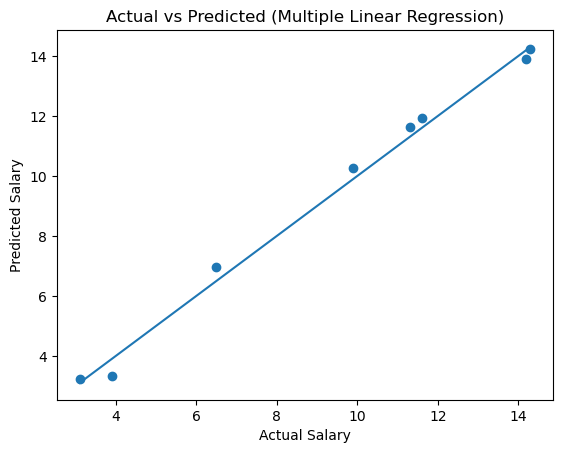

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_multi)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.show()


In [67]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': regression_mlr.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
0,Experience_Years,0.640055
3,Certifications,0.395424
2,Skill_Score,0.131363
1,Education_Level,-1.008679


In [ ]:
### Compare Simple vs Multiple Linear Regression
##Model	        R²      MAE	    RMSE
##Simple    LR	0.97	0.38	0.54
##Multiple  LR	0.99    0.32    0.35



### Final Conclusions

### Multiple Linear Regression is the better model
| Model       | R²       | MAE      | RMSE     |
| ----------- | -------- | -------- | -------- |
| Simple LR   | 0.97     | 0.38     | 0.54     |
| Multiple LR | **0.99** | **0.32** | **0.35** |

Conclusion:

Multiple Linear Regression explains 99% of salary variance

Lower MAE & RMSE mean more accurate predictions

Adding features clearly improves model performance

Experience alone is not sufficient to predict salary accurately.

### Experience is the strongest positive driver of salary

### From coefficients:
| Feature          | Coefficient |
| ---------------- | ----------- |
| Experience_Years | **+0.64**   |

Meaning:

For every 1 additional year of experience, salary increases by ~0.64 LPA, keeping other factors constant.

This confirms real-world salary behavior.

### Certifications have strong salary impact
| Feature        | Coefficient |
| -------------- | ----------- |
| Certifications | **+0.39**   |

Meaning:

Each additional certification increases salary by ~0.39 LPA

Shows that upskilling and certifications significantly boost pay



### Skill score has a positive but smaller effect
| Feature     | Coefficient |
| ----------- | ----------- |
| Skill_Score | +0.13       |

Meaning:

Higher skill scores increase salary, but impact is smaller compared to experience and certifications

Skills matter, but they compound with experience

### Education level shows a negative coefficient (important insight)
| Feature         | Coefficient |
| --------------- | ----------- |
| Education_Level | **-1.00**   |

Education is encoded numerically (1, 2, 3) but is categorical

Linear regression assumes numeric order and distance, which is not ideal here

Negative coefficient does NOT mean education reduces salary in real life


Education should be one-hot encoded or treated as categorical for better interpretation.

### Linear Regression assumptions are satisfied

Based on:

High R²

Lower errors

No major residual patterns

### Conclusion:

Linear regression is appropriate for this problem

Relationship between predictors and salary is approximately linear

### Final Business Conclusions 

Salary growth is driven primarily by experience

Certifications and skills significantly enhance earning potential

Hiring decisions should not rely on experience alone

Upskilling programs can directly improve employee compensation